In [1]:
import json
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import gridspec

startTime = 3.0

pktPayloadSize = 1460 # Bytes
hdrSize = 40 # Bytes
mtu = pktPayloadSize + hdrSize

torBw = 10e9 # bps
baseRtt = 5.12e-6 # seconds
bdpPkts = torBw * baseRtt / 8 / mtu # packets

In [2]:
# targetKeys = ['10.0.98.1:1098-10.0.52.1:1052', '10.0.98.1:1098-10.0.2.1:1002']
targetKeys = []

# Importing PktTrace Data

In [3]:
pktTraceData = {}

with open("debug-pktTrace.tr",'r') as f:
    for line in f:
        pktLog = line.split()

        traceType = pktLog[0]
        time = float(pktLog[1])*1e-9 -startTime # in seconds
        sender = pktLog[2]                      # ip:port
        receiver = pktLog[3]                    # ip:port
        txMsgId = int(pktLog[4])
        pktOffset = int(pktLog[5])
        prio = int(pktLog[6])
        
        key = sender + '-' + receiver 
        if (len(targetKeys) > 0 and key not in targetKeys):
            continue
        
        if (key not in pktTraceData):
            pktTraceData[key] = {}
            
        if (traceType not in pktTraceData[key]):
            pktTraceData[key][traceType] = {}
            pktTraceData[key][traceType]['times'] = []
            pktTraceData[key][traceType]['offsets'] = []
            pktTraceData[key][traceType]['prios'] = []
            
        pktTraceData[key][traceType]['times'].append(time)
        pktTraceData[key][traceType]['offsets'].append(pktOffset)
        pktTraceData[key][traceType]['prios'].append(prio)

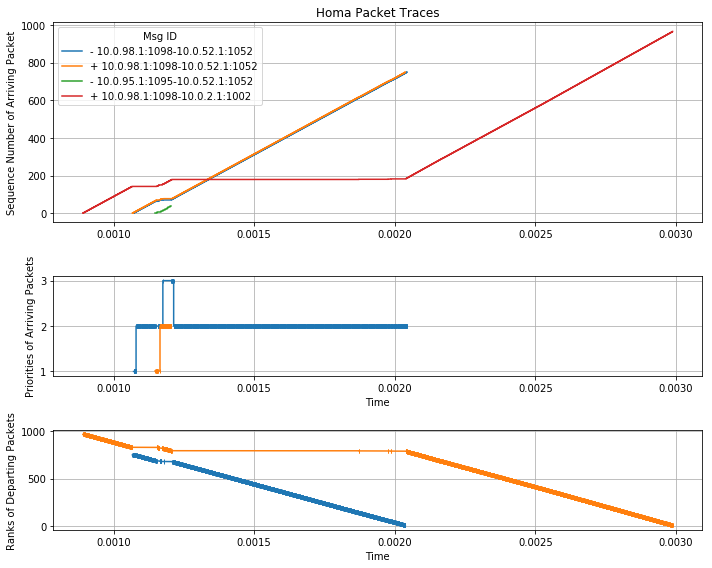

In [4]:
xlim = None#[0.00173,0.00178]#
ylim = None#[180,210]#[495,525]#
fig = plt.figure(figsize=(10,8)) 
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])

ax0 = plt.subplot(gs[0])

for key, val in pktTraceData.items():
    if (len(targetKeys) > 0 and key not in targetKeys):
        continue
    if ('-' in val):
        plt.step(val['-']['times'], val['-']['offsets'], label='- '+key, where='post')
    if ('+' in val):
        plt.step(val['+']['times'], val['+']['offsets'], label='+ '+key, where='post')

plt.title('Homa Packet Traces')
plt.ylabel('Sequence Number of Arriving Packet')
ax0.legend(title='Msg ID')
# ax0.yaxis.set_minor_locator(MultipleLocator(bdpPkts))
# ax0.yaxis.set_major_locator(MultipleLocator(4*bdpPkts))
# ax0.xaxis.set_minor_locator(MultipleLocator(baseRtt))
# ax0.xaxis.set_major_locator(MultipleLocator(4*baseRtt))
ax0.grid(which='major', alpha = 2.0)
ax0.grid(which='minor', alpha = 0.5)
if (xlim): plt.xlim(xlim)
if (ylim): plt.ylim(ylim)
plt.tight_layout()

ax1 = plt.subplot(gs[1], sharex=ax0)
for key, val in pktTraceData.items():
    if (len(targetKeys) > 0 and key not in targetKeys):
        continue
    if ('-' in val):
        plt.step(val['-']['times'], val['-']['prios'], 
                 label=key, marker='|', ms=4, where='post')
    
plt.ylabel('Priorities of Arriving Packets')
plt.xlabel('Time')
# ax1.xaxis.set_minor_locator(MultipleLocator(baseRtt))
# ax1.xaxis.set_major_locator(MultipleLocator(5*baseRtt))
ax1.grid(which='major', alpha = 2.0)
ax1.grid(which='minor', alpha = 0.5)
if (xlim): plt.xlim(xlim)
plt.tight_layout()

ax2 = plt.subplot(gs[2])
for key, val in pktTraceData.items():
    if (len(targetKeys) > 0 and key not in targetKeys):
        continue
    if ('+' in val):
        plt.step(val['+']['times'], val['+']['prios'], 
                 label=key, marker='|', ms=4, where='post')
    
plt.ylabel('Ranks of Departing Packets')
plt.xlabel('Time')
# ax2.xaxis.set_minor_locator(MultipleLocator(baseRtt))
# ax2.xaxis.set_major_locator(MultipleLocator(5*baseRtt))
ax2.grid(which='major', alpha = 2.0)
ax2.grid(which='minor', alpha = 0.5)
if (xlim): plt.xlim(xlim)
plt.tight_layout()

plt.show()